In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium 


In [3]:
bike_data_hourly = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Hourly_Weather.csv')

In [4]:
bike_data_daily = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Daily_Weather.csv')

In [5]:
bike_data_hourly.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [6]:
def humidity_category(humidity):
    if humidity <= 30:
        return 'Very Dry'
    elif 31 <= humidity <= 50:
        return 'Dry'
    elif 51 <= humidity <= 70:
        return 'Moderate'
    elif 71 <= humidity <= 85:
        return 'Humid'
    else:  # humidity > 85
        return 'Very Humid'

bike_data_hourly['humidity_catogorised'] = bike_data_hourly['relativehumidity_2m (%)'].apply(humidity_category)

In [7]:
def temperature_category(temp):
    if temp >= 30:
        return 'Hot'
    elif 20 <= temp < 30:
        return 'Warm'
    elif 10 <= temp < 20:
        return 'Temperate'
    elif 0 <= temp < 10:
        return 'Cool'
    elif -10 <= temp < 0:
        return 'Cold'
    else:  # temp < -10
        return 'Freezing'

bike_data_hourly['temp_catogorised'] = bike_data_hourly['temperature_2m (°C)'].apply(temperature_category)

In [8]:
bike_data_hourly['weathercode (wmo code)'].unique()

array([ 1,  2,  3, 51, 53, 61, 63,  0, 71, 73, 55, 75, 65])

In [9]:
weather = {
0:	'Clear sky',
1:	'Mainly clear',
2:	'Partly cloudy',
3:	'Overcast',
51:	'Light drizzle',
53:	'Moderate drizzle',
55:	'Dense drizzle',
61:	'Slight rain',
63:	'Moderate rain',
65:	'Heavy rain',
71:	'Slight snow fall',
73:	'Moderate snow fall',
75:	'Heavy snow fall'
}

bike_data_hourly['weather_catagorised'] = bike_data_hourly['weathercode (wmo code)'].map(weather)

In [10]:
def wind_feel(speed):
    if speed <= 5:
        return 'Calm'
    elif 6 <= speed <= 28:
        return 'Light to Moderate Breeze'
    elif 29 <= speed <= 61:
        return 'Fresh to Strong Breeze'
    elif 62 <= speed <= 88:
        return 'High Wind to Gale'
    else:  # speed > 88
        return 'Severe Gale to Hurricane'

bike_data_hourly['wind_catagorised'] = bike_data_hourly['windspeed_10m (km/h)'].apply(wind_feel)

In [11]:
bike_data_hourly['Date'] = pd.to_datetime(bike_data_hourly['Date'])

In [12]:
bike_data_hourly.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),humidity_catogorised,temp_catogorised,weather_catagorised,wind_catagorised
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Very Humid,Cool,Mainly clear,Light to Moderate Breeze
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Very Humid,Cool,Mainly clear,Light to Moderate Breeze
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Very Humid,Cool,Partly cloudy,Light to Moderate Breeze
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Humid,Cool,Partly cloudy,Light to Moderate Breeze
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Humid,Cool,Partly cloudy,Light to Moderate Breeze


In [13]:
bike_data_hourly.dtypes

Casual                            float64
Date                       datetime64[ns]
Hour                                int64
Member                            float64
Total_rides                       float64
relativehumidity_2m (%)             int64
temperature_2m (°C)               float64
weathercode (wmo code)              int64
windspeed_10m (km/h)              float64
humidity_catogorised               object
temp_catogorised                   object
weather_catagorised                object
wind_catagorised                   object
dtype: object

[Text(0.5, 0, 'Casual'),
 Text(1.5, 0, 'Date'),
 Text(2.5, 0, 'Hour'),
 Text(3.5, 0, 'Member'),
 Text(4.5, 0, 'Total_rides'),
 Text(5.5, 0, 'relativehumidity_2m (%)'),
 Text(6.5, 0, 'temperature_2m (°C)'),
 Text(7.5, 0, 'weathercode (wmo code)'),
 Text(8.5, 0, 'windspeed_10m (km/h)')]

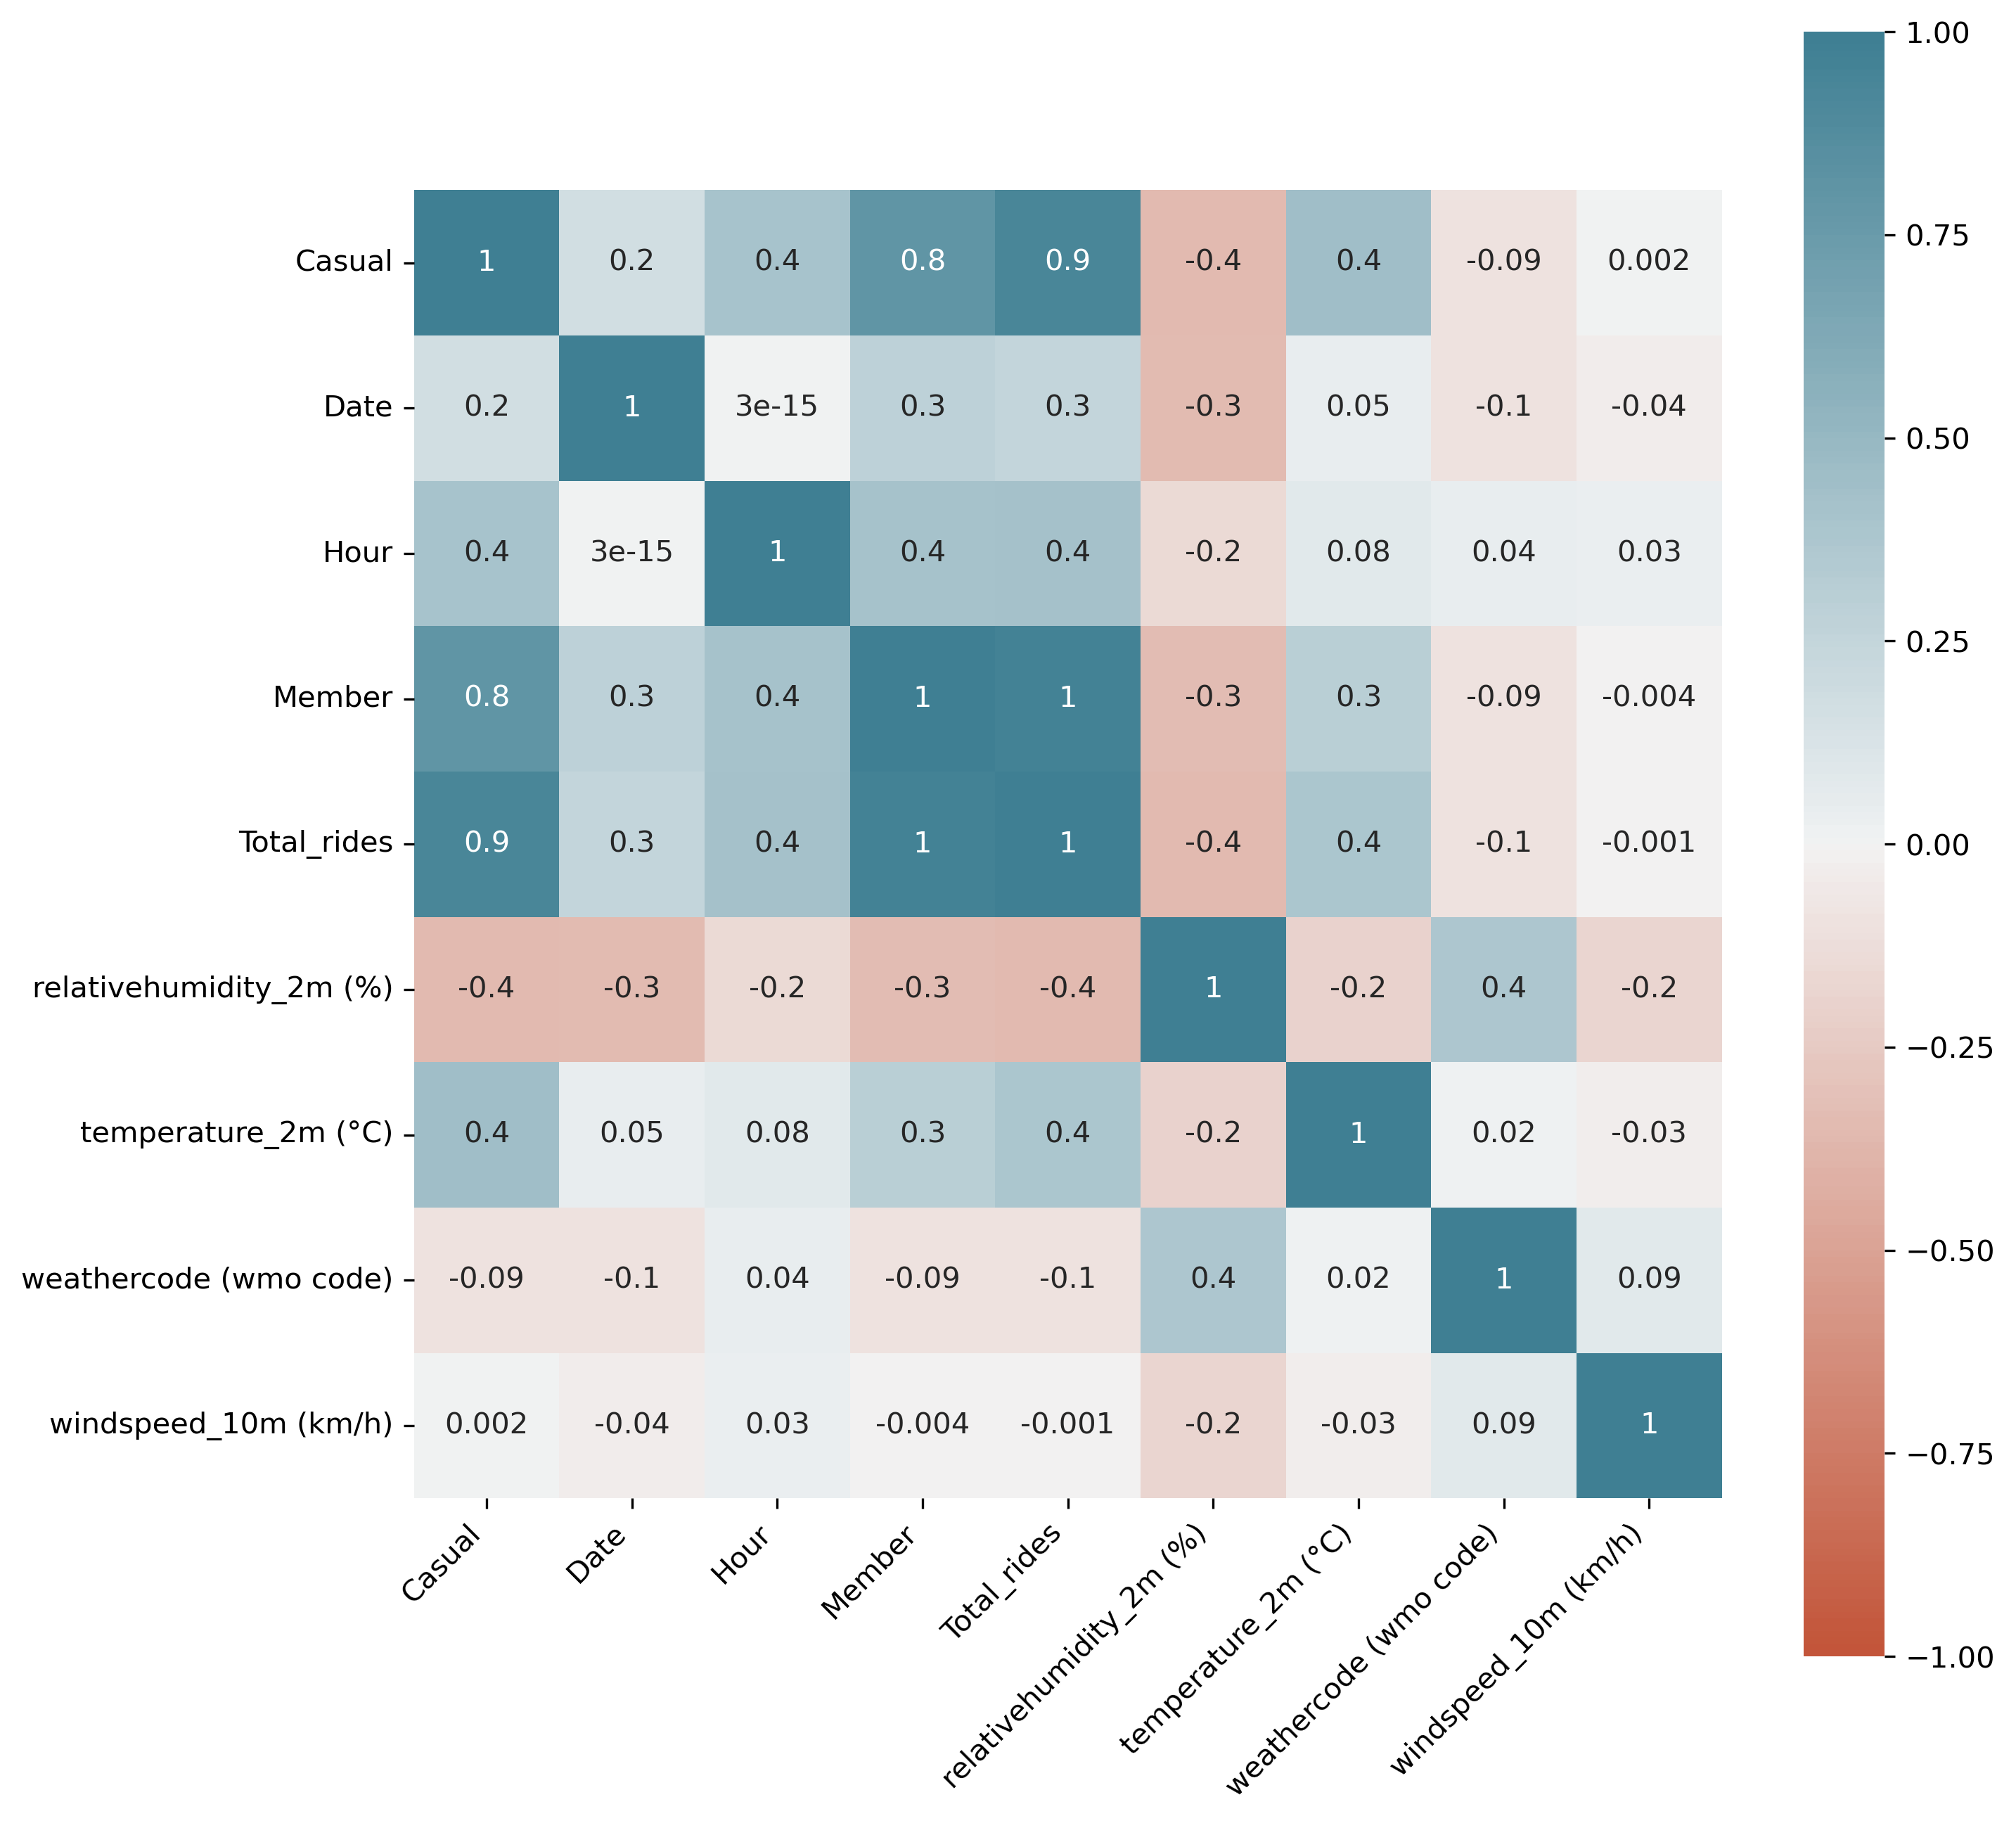

In [14]:
bike_data_hourly_corr = bike_data_hourly.drop(columns=['humidity_catogorised','temp_catogorised','weather_catagorised','wind_catagorised'])

corr = bike_data_hourly_corr.corr()

plt.figure(figsize=(10,10), dpi=300)

ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True,
annot= True, fmt='.1g'
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)



<Axes: xlabel='humidity_catogorised', ylabel='Total_rides'>

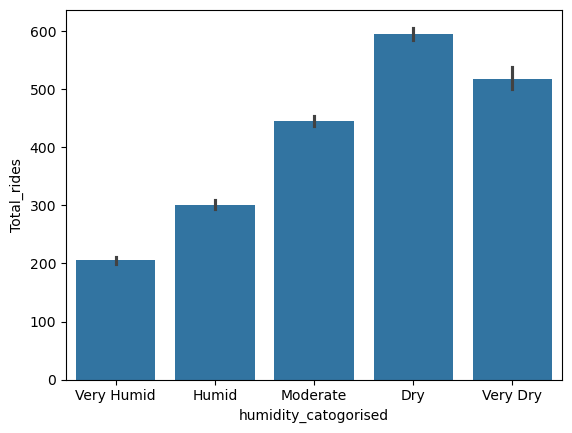

In [15]:
sns.barplot(data=bike_data_hourly, x='humidity_catogorised', y='Total_rides')

<Axes: xlabel='temp_catogorised', ylabel='Date'>

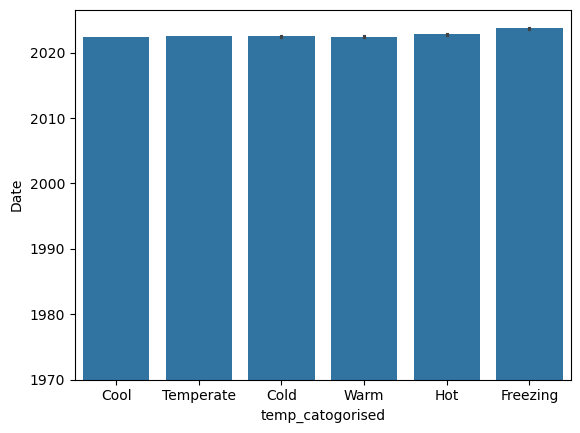

In [16]:
sns.barplot(data=bike_data_hourly, x='temp_catogorised', y='Date')

([0, 1, 2, 3],
 [Text(0, 0, 'Light to Moderate Breeze'),
  Text(1, 0, 'Calm'),
  Text(2, 0, 'Severe Gale to Hurricane'),
  Text(3, 0, 'Fresh to Strong Breeze')])

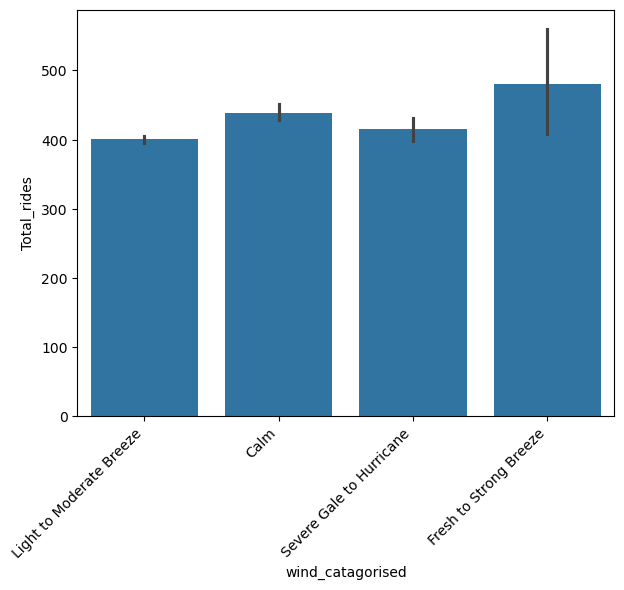

In [17]:
sns.barplot(data=bike_data_hourly, x='wind_catagorised', y='Total_rides')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')

In [18]:
bike_data_hourly['Hour'].max()

23

In [19]:
print(bike_data_hourly['temperature_2m (°C)'].min())

-14.6


In [20]:
bike_data_hourly['Hour'] = pd.to_datetime(bike_data_hourly['Hour'], format='%H')

In [21]:
bike_data_daily['Date'] = pd.to_datetime(bike_data_daily['Date'], format='%Y-%m-%d')

In [22]:
bike_data_hourly['day_time'] = bike_data_hourly['Hour'].dt.hour.apply(lambda value: ' early morning'
if value <= 6 else 'late morning'
if value <= 12 else 'afternoon'
if value <= 18 else 'night')

<Axes: xlabel='day_time', ylabel='Casual'>

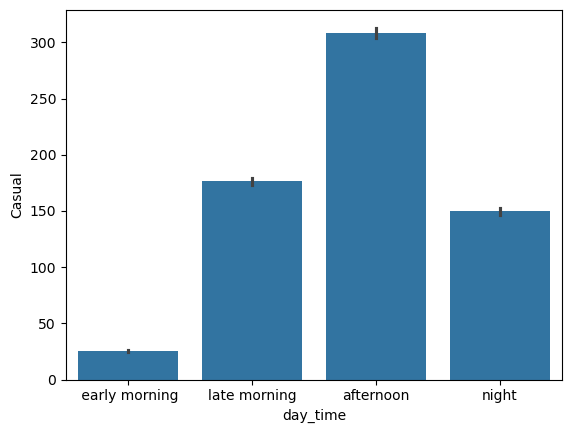

In [23]:
sns.barplot(data=bike_data_hourly, x='day_time', y='Casual')

<Axes: xlabel='day_time', ylabel='Total_rides'>

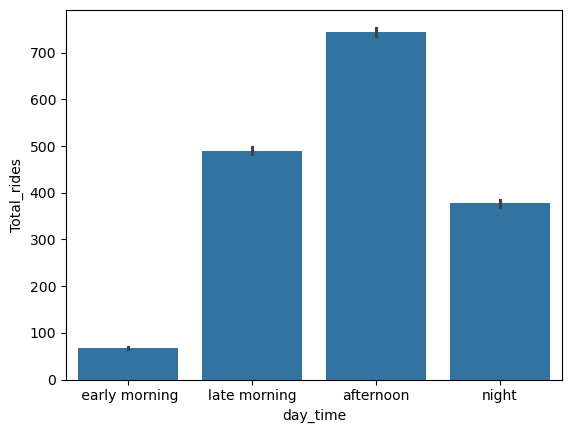

In [24]:
sns.barplot(data=bike_data_hourly, x='day_time', y='Total_rides')

<Axes: xlabel='day_time', ylabel='Total_rides'>

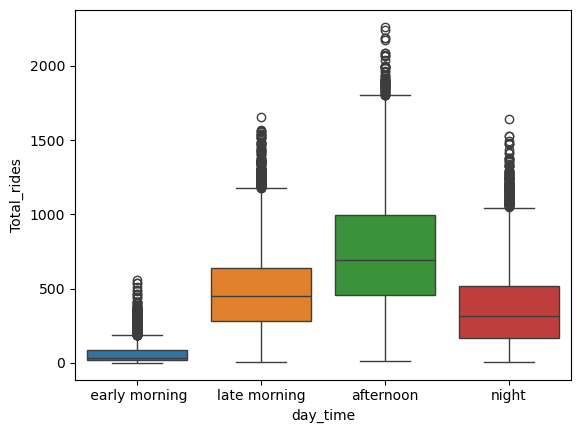

In [25]:
sns.boxplot(data=bike_data_hourly, hue='day_time', x='day_time', y='Total_rides')

In [26]:
bike_data_daily['weathercode (wmo code)'].unique()

array([63, 61,  3, 51,  2,  1,  0, 53, 73, 71, 75, 55, 65])

In [27]:
bike_data_daily['Date'] = pd.to_datetime(bike_data_daily['Date'])

In [28]:
def get_season(Date):
    month = Date.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'

bike_data_daily['season'] = bike_data_daily['Date'].apply(get_season)

In [29]:
import holidays

us_holidays = holidays.US()

bike_data_daily['holiday'] = bike_data_daily['Date'].apply(lambda value: value in us_holidays)

print(bike_data_daily[['Date', 'holiday']].head())

        Date  holiday
0 2021-01-01     True
1 2021-01-02    False
2 2021-01-03    False
3 2021-01-04    False
4 2021-01-05    False


In [30]:
weather = {
0:	'Clear sky',
1:	'Mainly clear',
2:	'Partly cloudy',
3:	'Overcast',
51:	'Light drizzle',
53:	'Moderate drizzle',
55:	'Dense drizzle',
61:	'Slight rain',
63:	'Moderate rain',
65:	'Heavy rain',
71:	'Slight snow fall',
73:	'Moderate snow fall',
75:	'Heavy snow fall'
}

bike_data_daily['weather'] = bike_data_daily['weathercode (wmo code)'].map(weather)

In [31]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle


In [32]:
def feel(temp):
    if temp >= 30:
        return 'Hot'
    elif 20 <= temp < 30:
        return 'Warm'
    elif 10 <= temp < 20:
        return 'Temperate'
    elif 0 <= temp < 10:
        return 'Cool'
    elif -10 <= temp < 0:
        return 'Cold'
    else:  # temp < -10
        return 'Freezing'

bike_data_daily['feels'] = bike_data_daily['apparent_temperature_mean (°C)'].apply(feel)

In [33]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool


In [34]:
for value in bike_data_daily:
    bike_data_daily['percentage_of_members'] = round((bike_data_daily['Member'] / bike_data_daily['Total_rides']) * 100, 2)


In [35]:
def wind_feel(speed):
    if speed <= 5:
        return 'Calm'
    elif 6 <= speed <= 28:
        return 'Light to Moderate Breeze'
    elif 29 <= speed <= 61:
        return 'Fresh to Strong Breeze'
    elif 62 <= speed <= 88:
        return 'High Wind to Gale'
    else:  # speed > 88
        return 'Severe Gale to Hurricane'

bike_data_daily['wind_catagorised'] = bike_data_daily['windspeed_10m_max (km/h)'].apply(wind_feel)

In [36]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels,percentage_of_members,wind_catagorised
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold,61.39,Light to Moderate Breeze
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool,49.74,Light to Moderate Breeze
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool,69.59,Light to Moderate Breeze
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool,69.57,Light to Moderate Breeze
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool,65.47,Light to Moderate Breeze


In [37]:
def year(date):
    get_year = date.year

    if get_year == 2021:
        return '2021'
    elif get_year == 2022:
        return '2022'
    elif get_year == 2023:
        return '2023'

bike_data_daily['year'] = bike_data_daily['Date'].apply(year)

In [38]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels,percentage_of_members,wind_catagorised,year
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold,61.39,Light to Moderate Breeze,2021
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool,49.74,Light to Moderate Breeze,2021
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool,69.59,Light to Moderate Breeze,2021
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool,69.57,Light to Moderate Breeze,2021
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool,65.47,Light to Moderate Breeze,2021


<Axes: xlabel='season', ylabel='Total_rides'>

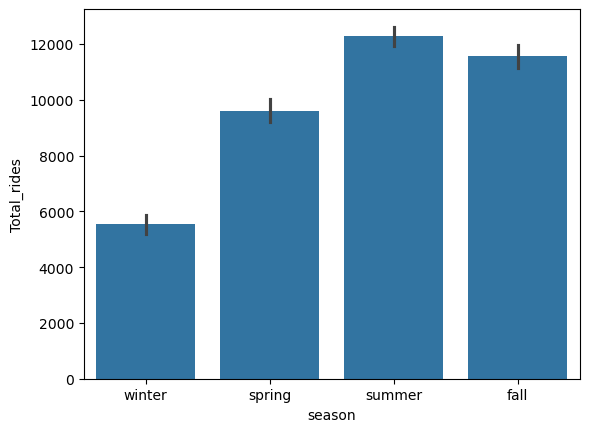

In [39]:
sns.barplot(data=bike_data_daily, x='season', y='Total_rides')

In [40]:
bike_data_daily['day_type'] = bike_data_daily['Date'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [41]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels,percentage_of_members,wind_catagorised,year,day_type
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold,61.39,Light to Moderate Breeze,2021,Weekday
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool,49.74,Light to Moderate Breeze,2021,Weekend
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool,69.59,Light to Moderate Breeze,2021,Weekend
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool,69.57,Light to Moderate Breeze,2021,Weekday
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool,65.47,Light to Moderate Breeze,2021,Weekday


/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_3386/3461688526.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bike_data_daily, x='season', y='windspeed_10m_max (km/h)', hue='wind_catagorised',ci=None)


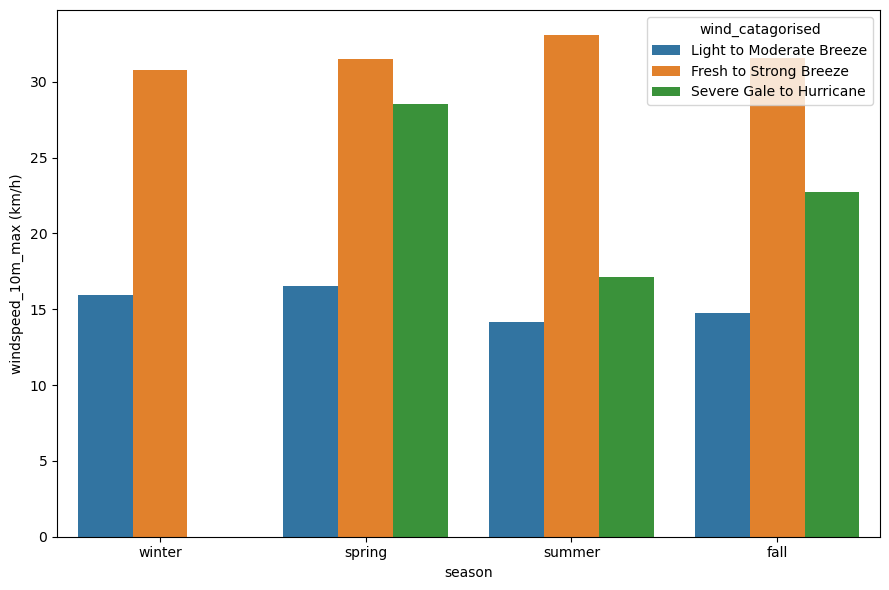

In [42]:
plt.figure(figsize=(9, 6))
sns.barplot(data=bike_data_daily, x='season', y='windspeed_10m_max (km/h)', hue='wind_catagorised',ci=None)
plt.tight_layout()

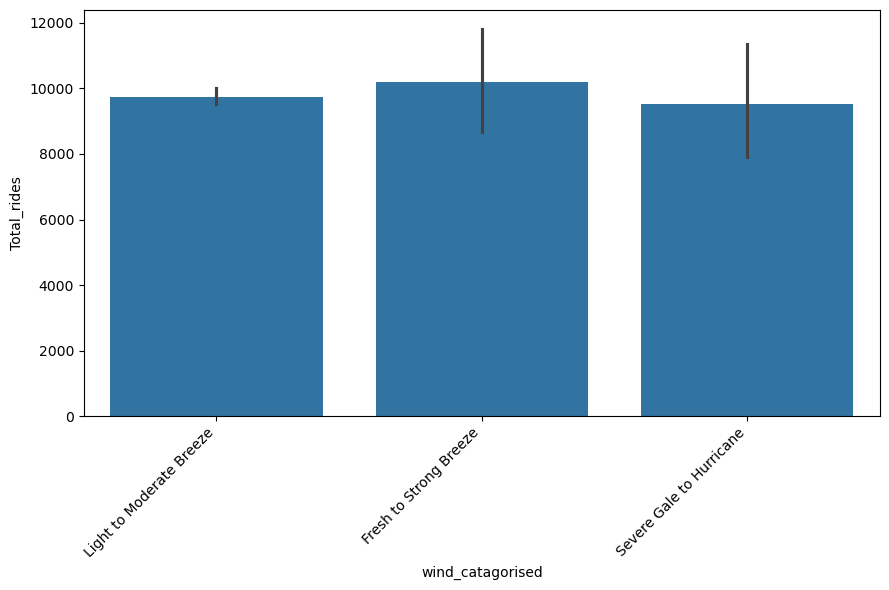

In [43]:
plt.figure(figsize=(9,6))
sns.barplot(data=bike_data_daily, x='wind_catagorised', y='Total_rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Axes: xlabel='holiday', ylabel='Total_rides'>

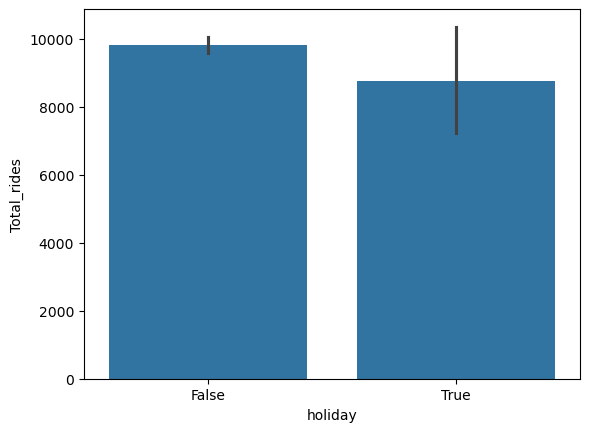

In [44]:
sns.barplot(data=bike_data_daily, x='holiday', y='Total_rides')

[Text(0.5, 0, 'Casual'),
 Text(1.5, 0, 'Date'),
 Text(2.5, 0, 'Member'),
 Text(3.5, 0, 'Total_rides'),
 Text(4.5, 0, 'apparent_temperature_mean (°C)'),
 Text(5.5, 0, 'temperature_2m_mean (°C)'),
 Text(6.5, 0, 'windspeed_10m_max (km/h)'),
 Text(7.5, 0, 'percentage_of_members'),
 Text(8.5, 0, 'year')]

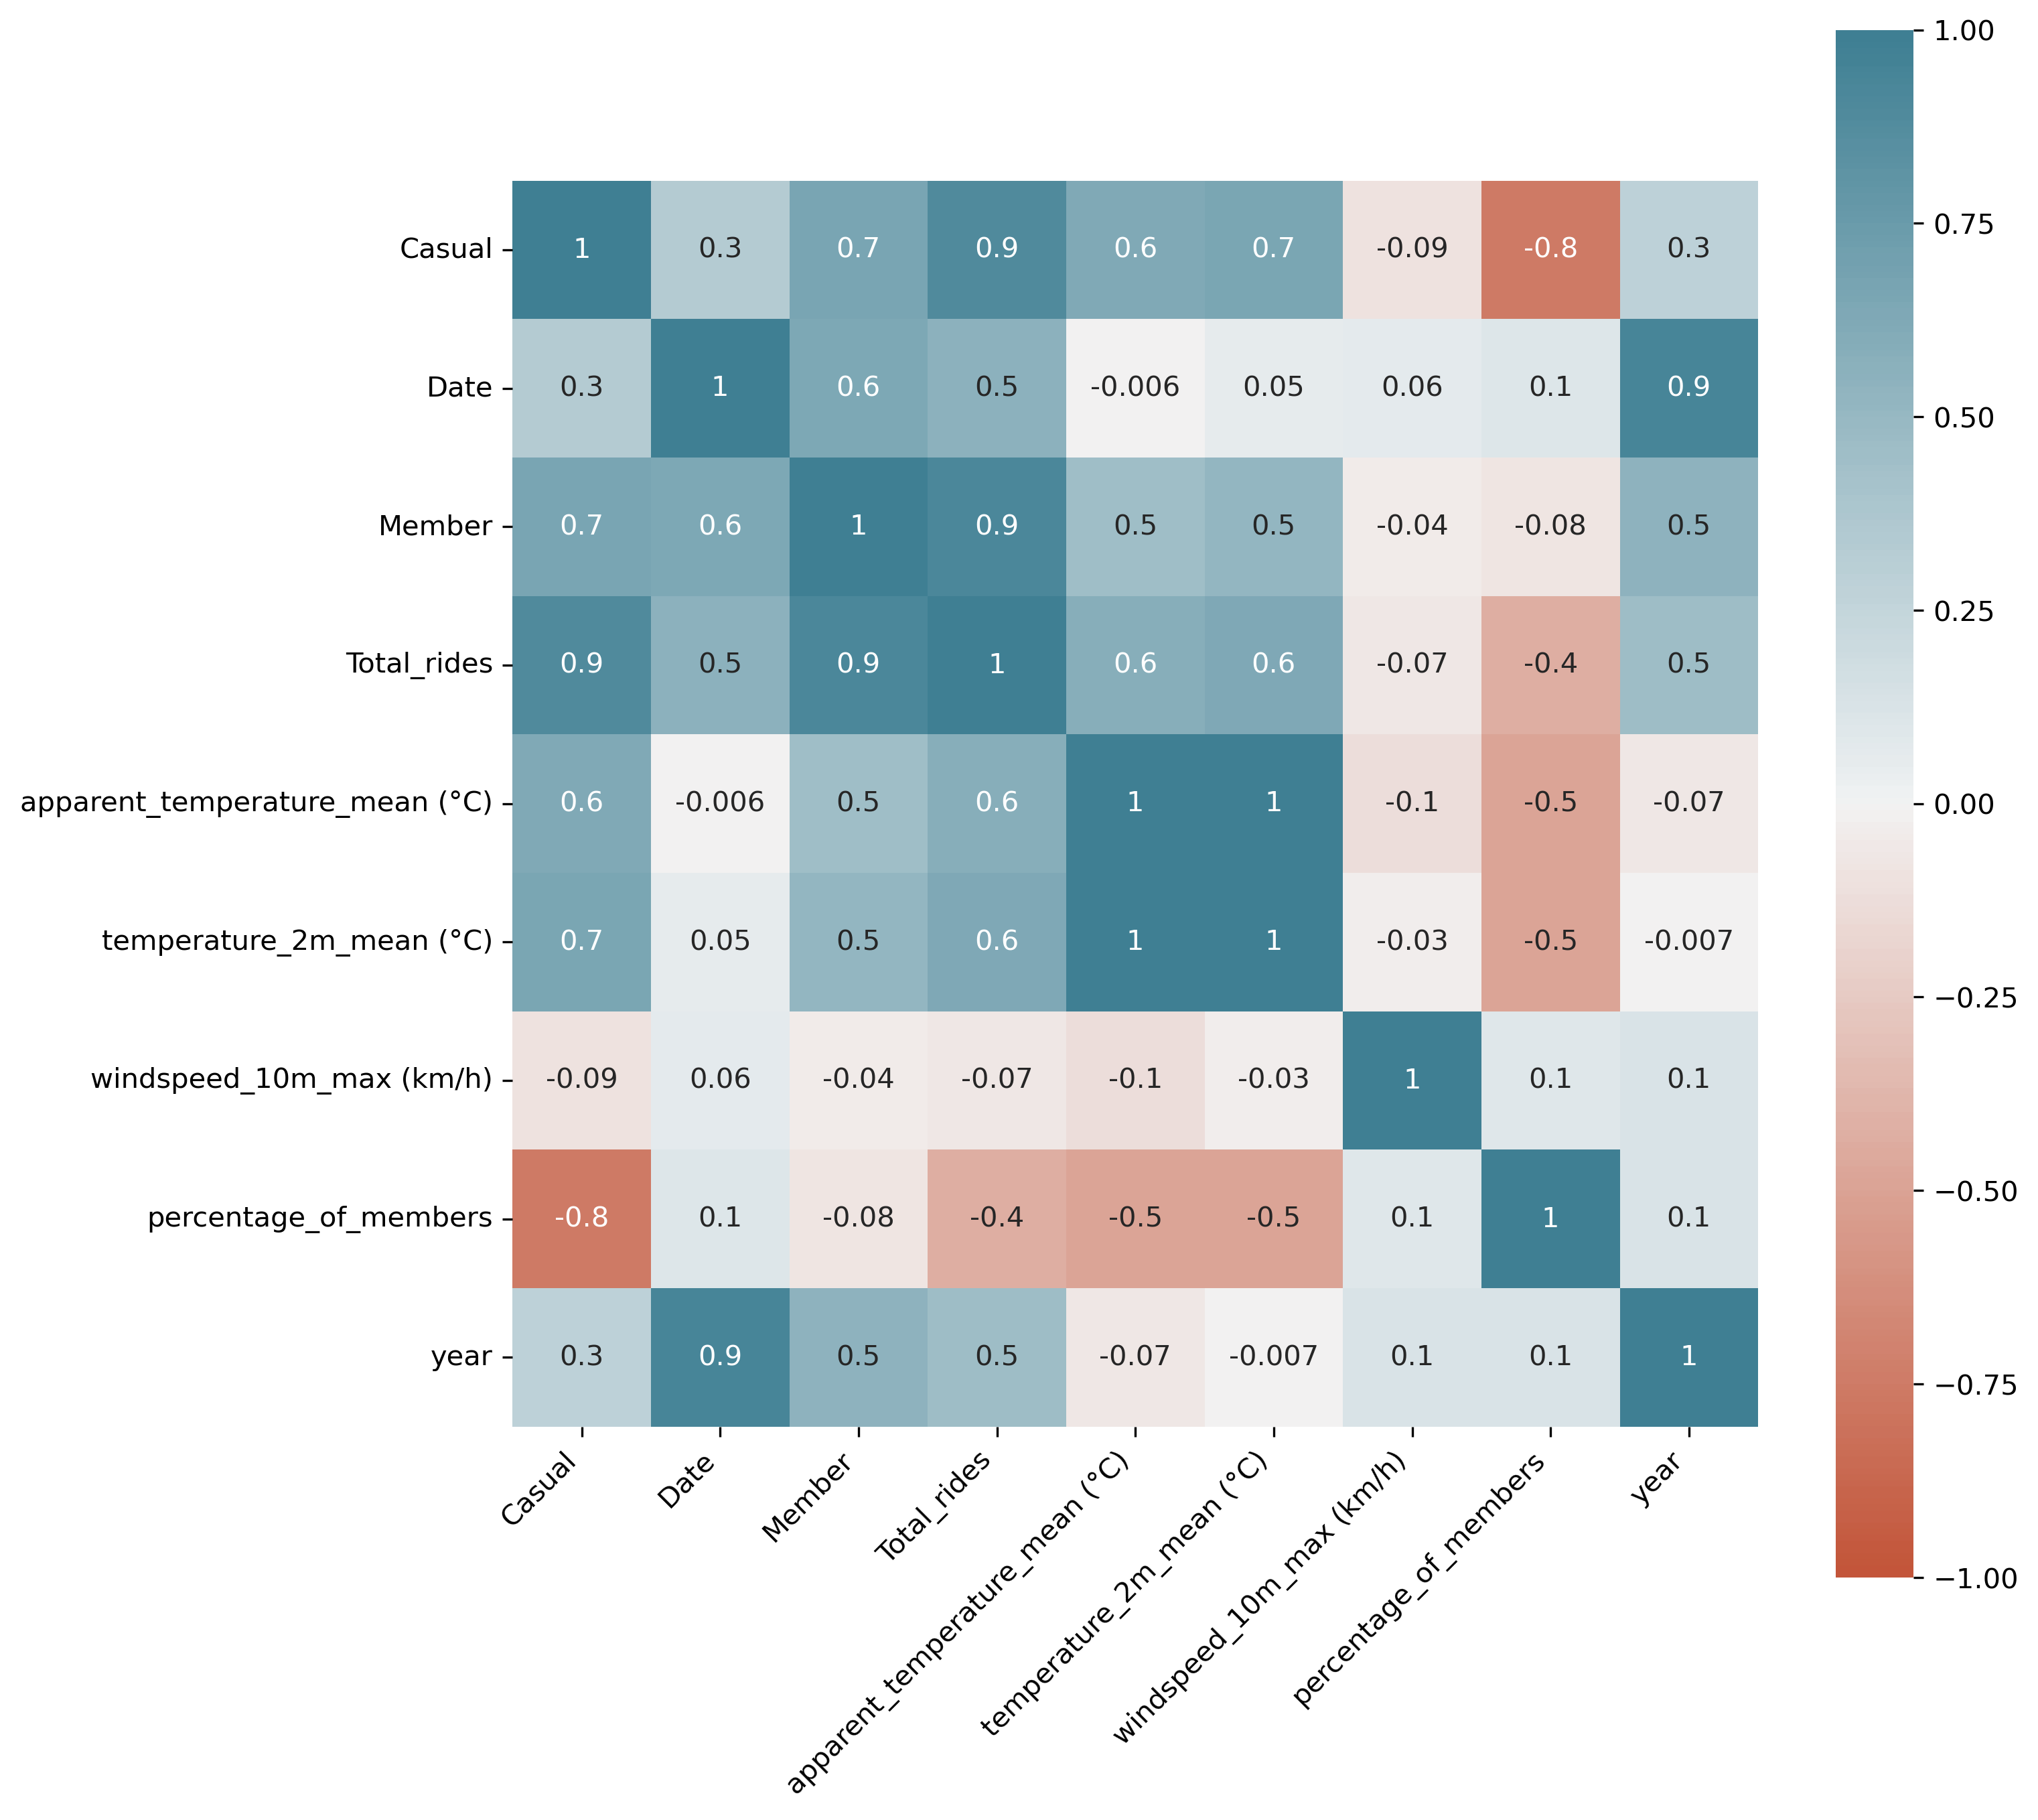

In [45]:
bike_data_daily_corr = bike_data_daily.drop(columns=['season',	'holiday',	'weather',	'feels', 'wind_catagorised', 'day_type', 'weathercode (wmo code)'])
corr = bike_data_daily_corr.corr()

plt.figure(figsize=(10,10), dpi=300)

ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True,
annot= True, fmt='.1g'
)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [46]:
bike_data_daily_corr['month'] = bike_data_daily_corr['Date'].dt.month

<Axes: xlabel='temperature_2m_mean (°C)', ylabel='Total_rides'>

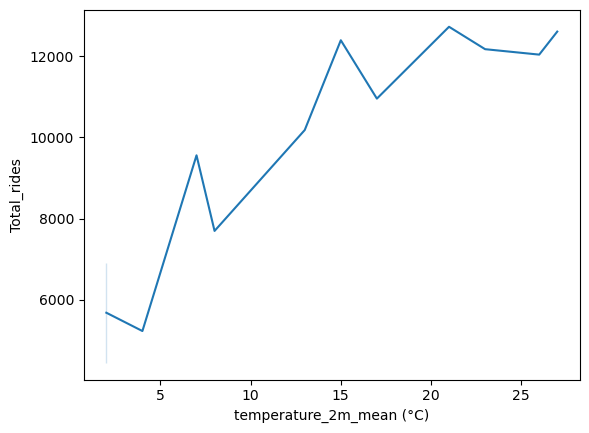

In [47]:

bike_data_daily_corr['year'] = bike_data_daily_corr['year'].astype(int)

bike_data_daily_corr.dropna(inplace=True)

data_grouped = bike_data_daily_corr.groupby('month').mean().reset_index()

data_grouped['temperature_2m_mean (°C)'] = data_grouped['temperature_2m_mean (°C)'].astype(int)

sns.lineplot(data=data_grouped, x='temperature_2m_mean (°C)', y='Total_rides')


In [48]:
data_grouped.dtypes

month                                      int32
Casual                                   float64
Date                              datetime64[ns]
Member                                   float64
Total_rides                              float64
apparent_temperature_mean (°C)           float64
temperature_2m_mean (°C)                   int64
windspeed_10m_max (km/h)                 float64
percentage_of_members                    float64
year                                     float64
dtype: object

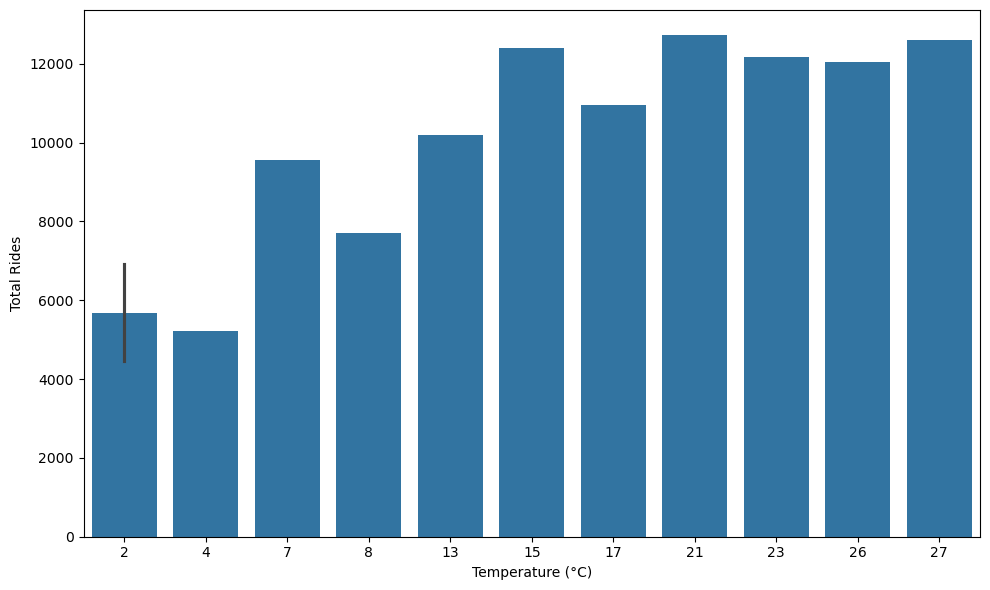

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_grouped, x='temperature_2m_mean (°C)', y='Total_rides')

plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()

In [50]:
bike_data_daily_corr.dtypes

Casual                                     int64
Date                              datetime64[ns]
Member                                     int64
Total_rides                                int64
apparent_temperature_mean (°C)           float64
temperature_2m_mean (°C)                 float64
windspeed_10m_max (km/h)                 float64
percentage_of_members                    float64
year                                       int64
month                                      int32
dtype: object

<Axes: xlabel='year', ylabel='percentage_of_members'>

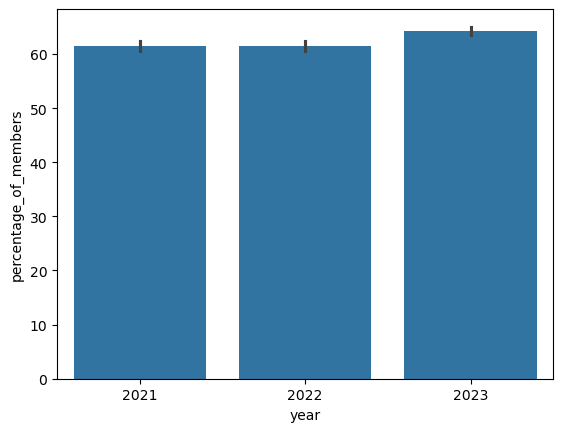

In [51]:
sns.barplot(data=bike_data_daily, x='year', y='percentage_of_members')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Moderate rain'),
  Text(1, 0, 'Slight rain'),
  Text(2, 0, 'Overcast'),
  Text(3, 0, 'Light drizzle'),
  Text(4, 0, 'Partly cloudy'),
  Text(5, 0, 'Mainly clear'),
  Text(6, 0, 'Clear sky'),
  Text(7, 0, 'Moderate drizzle'),
  Text(8, 0, 'Moderate snow fall'),
  Text(9, 0, 'Slight snow fall'),
  Text(10, 0, 'Heavy snow fall'),
  Text(11, 0, 'Dense drizzle'),
  Text(12, 0, 'Heavy rain')])

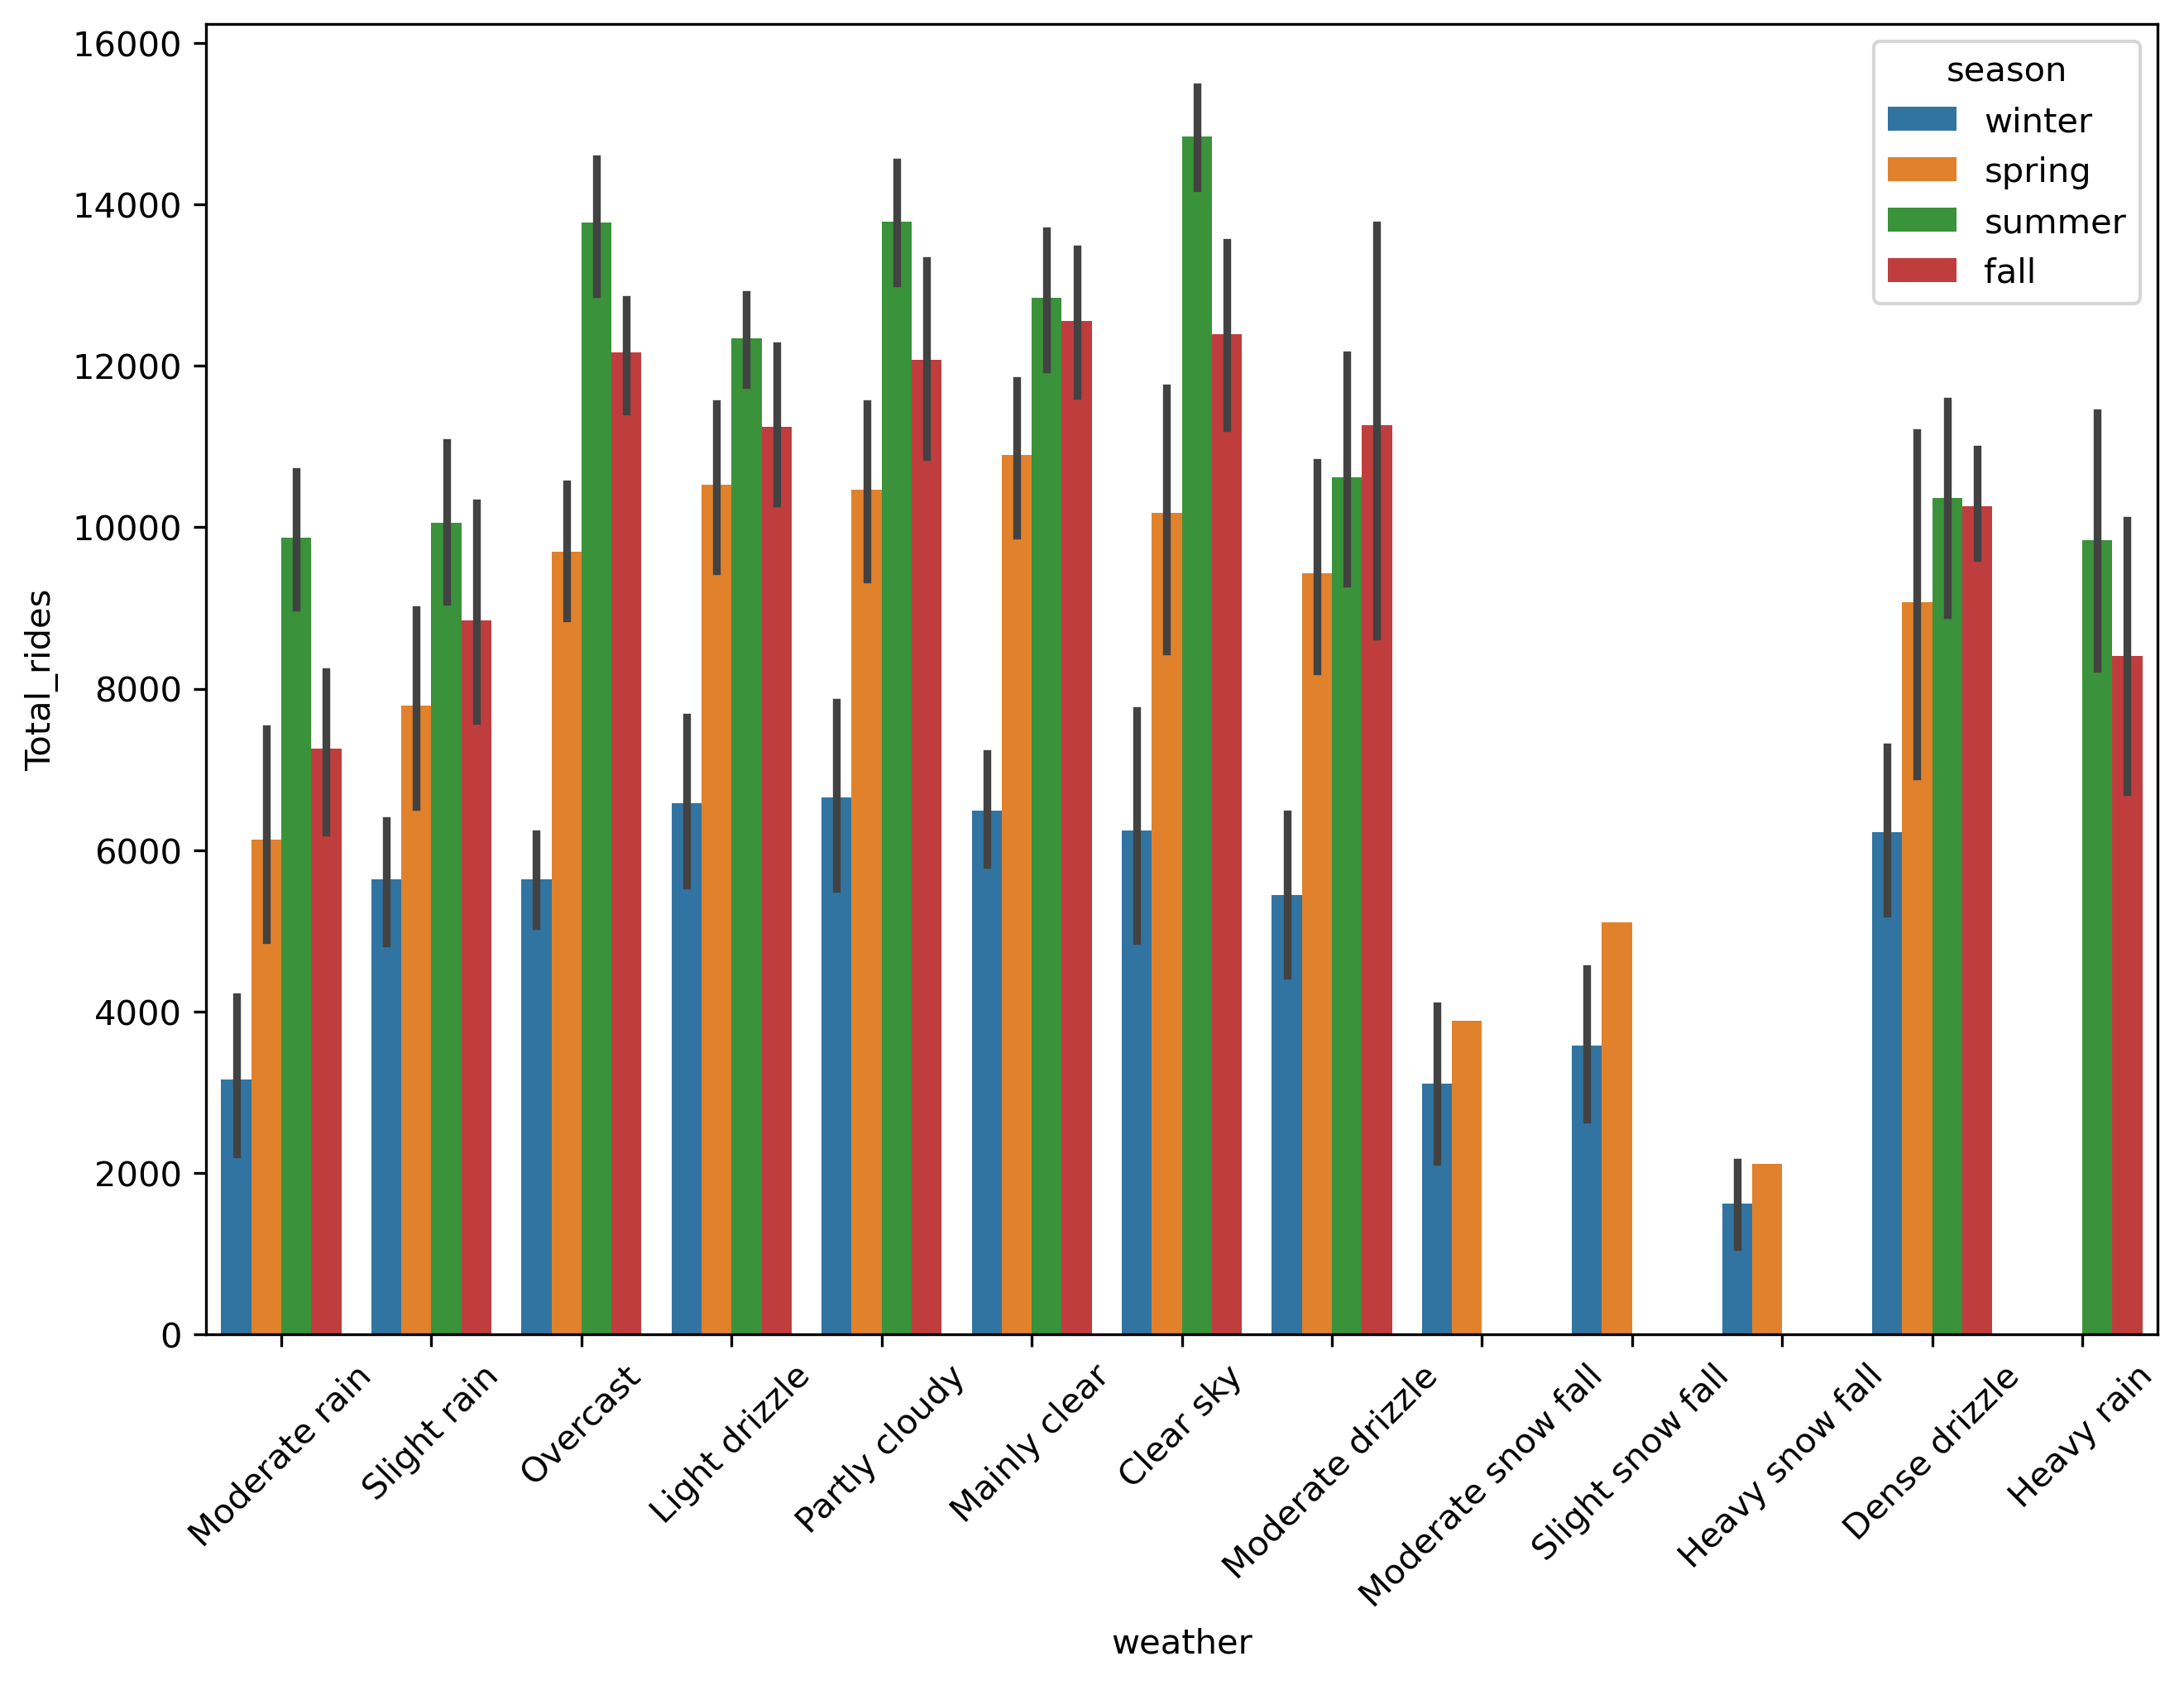

In [52]:
plt.figure(figsize=(9,6),dpi=300)
sns.barplot(data=bike_data_daily, x='weather', y='Total_rides',hue='season')
plt.tight_layout()
plt.xticks(rotation=45)

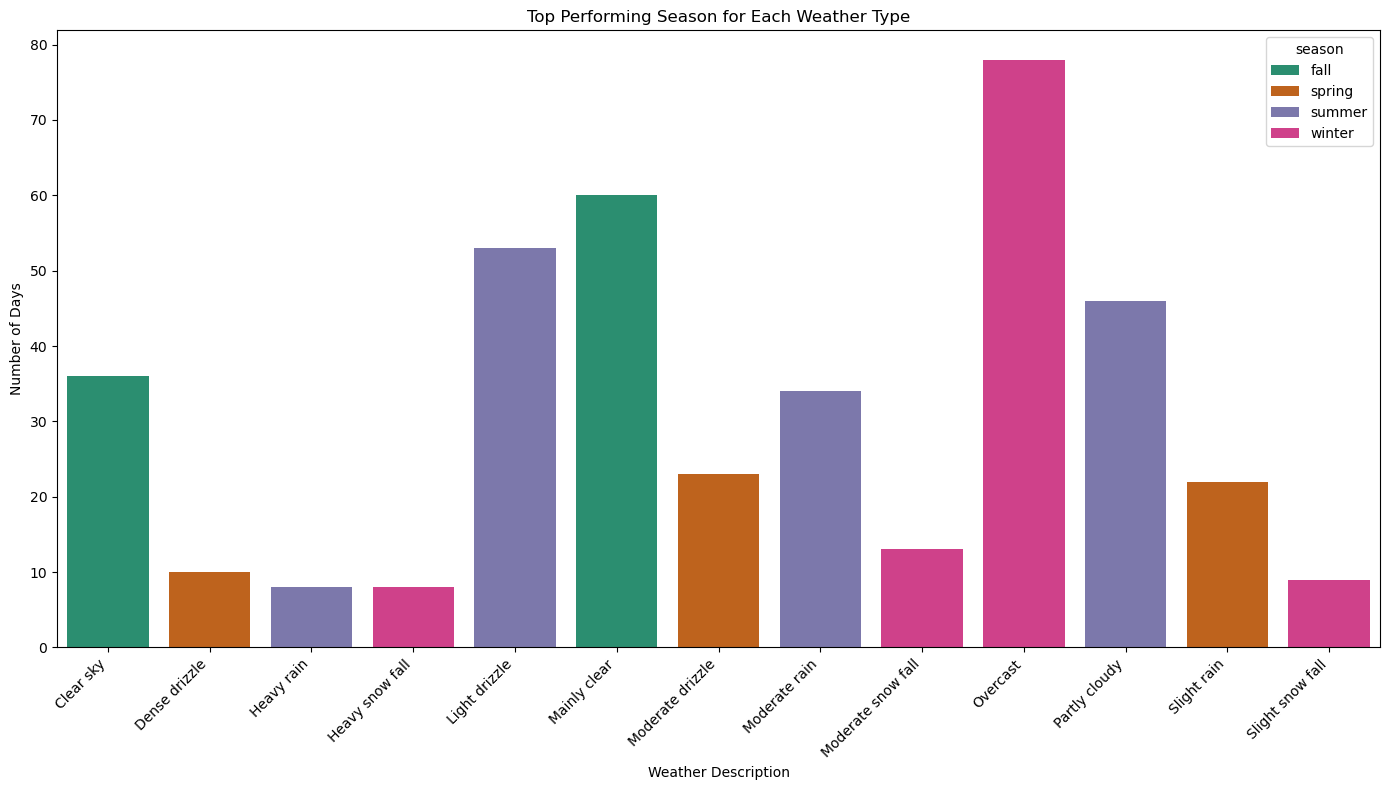

In [53]:
# Group by 'weather_description' and 'season', and count the occurrences
weather_season_counts = bike_data_daily.groupby(['weather', 'season']).size().reset_index(name='counts')

# Initialize an empty list to store the data for plotting
top_weather_season_data = []

# Loop over each unique weather description
for weather in weather_season_counts['weather'].unique():
    # Filter the data to get rows for the specific weather type
    weather_data = weather_season_counts[weather_season_counts['weather'] == weather]
    
    # Find the top performing season for the current weather type
    top_season_for_weather = weather_data.loc[weather_data['counts'].idxmax()]
    
    # Append the data of the top season for this weather type to the list
    top_weather_season_data.append(top_season_for_weather)

# Convert the list into a DataFrame for plotting
top_weather_season_df = pd.DataFrame(top_weather_season_data)

# Create the bar plot for top performing seasons of each weather type
plt.figure(figsize=(14, 8))
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
sns.barplot(data=top_weather_season_df, x='weather', y='counts', hue='season', palette='Dark2')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.title('Top Performing Season for Each Weather Type')
plt.xlabel('Weather Description')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()





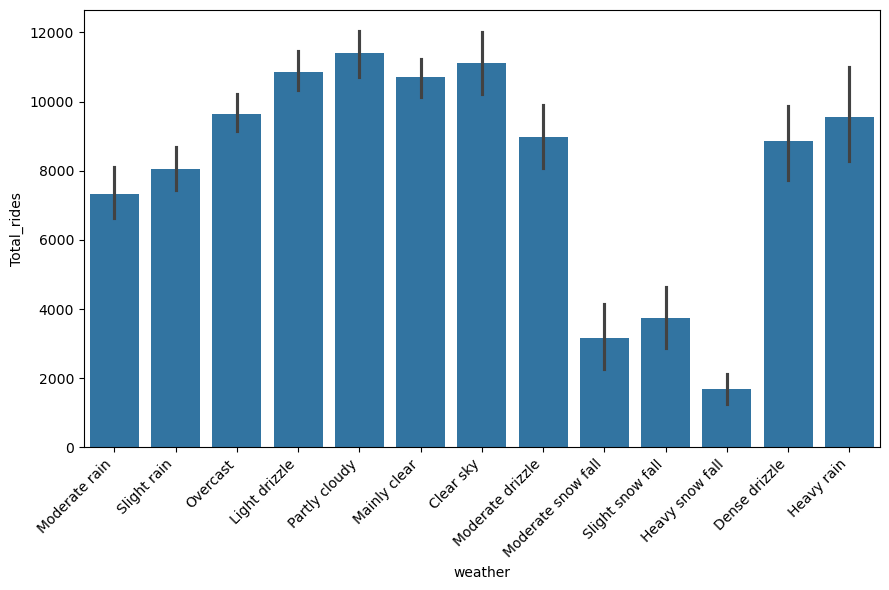

In [54]:
plt.figure(figsize=(9,6))
sns.barplot(data=bike_data_daily, x='weather', y='Total_rides' )
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Axes: xlabel='season', ylabel='percentage_of_members'>

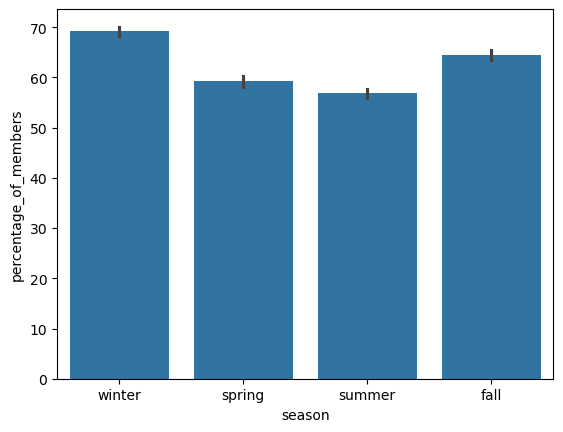

In [55]:
sns.barplot(data=bike_data_daily, x='season', y='percentage_of_members')

<Axes: xlabel='feels', ylabel='Total_rides'>

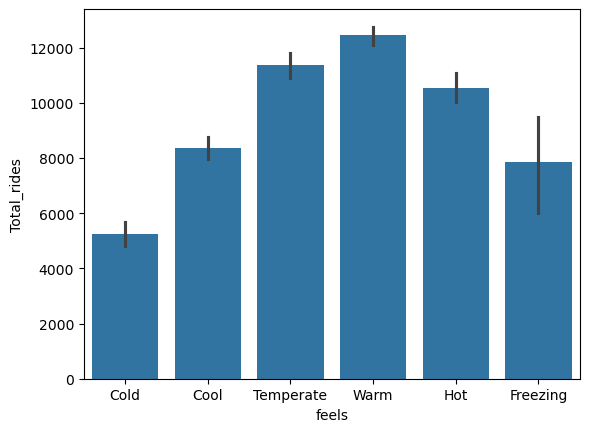

In [56]:
sns.barplot(data=bike_data_daily, x='feels', y='Total_rides')

In [57]:
bike_data_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,holiday,weather,feels,percentage_of_members,wind_catagorised,year,day_type
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,winter,True,Moderate rain,Cold,61.39,Light to Moderate Breeze,2021,Weekday
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,winter,False,Slight rain,Cool,49.74,Light to Moderate Breeze,2021,Weekend
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,winter,False,Moderate rain,Cool,69.59,Light to Moderate Breeze,2021,Weekend
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,winter,False,Overcast,Cool,69.57,Light to Moderate Breeze,2021,Weekday
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,winter,False,Light drizzle,Cool,65.47,Light to Moderate Breeze,2021,Weekday


<Axes: xlabel='day_type', ylabel='Member'>

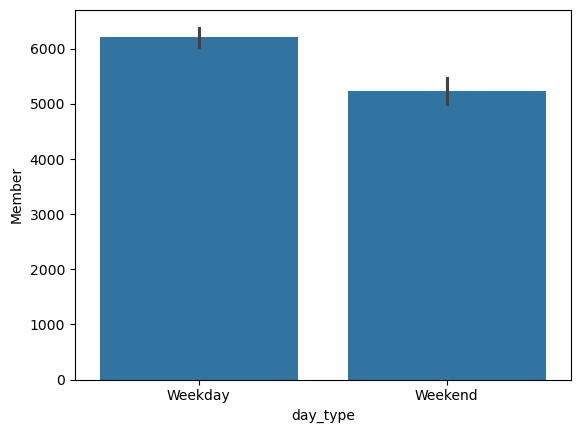

In [58]:
sns.barplot(data=bike_data_daily, x='day_type', y='Member')

<Axes: xlabel='day_type', ylabel='Casual'>

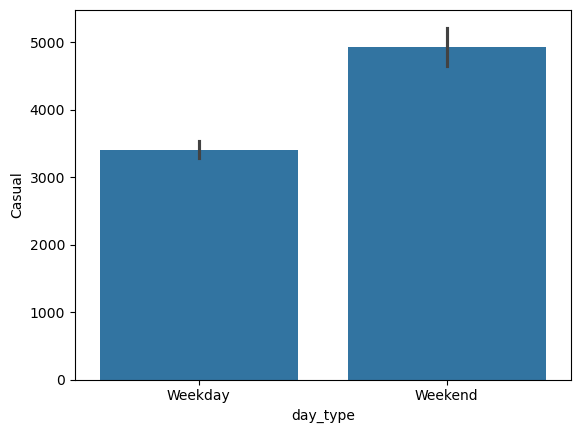

In [59]:
sns.barplot(data=bike_data_daily, x='day_type', y='Casual')

In [60]:
full_data = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Full.csv')

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_3386/4054110523.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Full.csv')


In [82]:
full_data = full_data.dropna()

In [83]:
full_data.index.max()

10693995

In [84]:
bike_data_daily.index.max()

1094

In [85]:
full_data['started_at'] = pd.to_datetime(full_data['started_at'])

full_data['ended_at'] = pd.to_datetime(full_data['ended_at'])

full_data['ride_duration'] = full_data['ended_at'] - full_data['started_at']

In [86]:
full_data['time_of_day'] = full_data['ended_at'].dt.hour.apply(lambda value : 'early morning'
if value <= 6 else 'late morning'
if value <= 12 else 'afternoon'
if value <= 18 else 'night')

In [87]:
full_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_of_day,day_of_week,ride_duration_minutes,ride_duration
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,early morning,Friday,25.333333,0 days 00:25:20
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,early morning,Friday,14.216667,0 days 00:14:13
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,early morning,Friday,5.583333,0 days 00:05:35
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,early morning,Friday,3.233333,0 days 00:03:14
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,early morning,Friday,17.366667,0 days 00:17:22


In [88]:
full_data.dtypes

ride_id                           object
rideable_type                     object
started_at                datetime64[ns]
ended_at                  datetime64[ns]
start_station_name                object
start_station_id                  object
end_station_name                  object
end_station_id                    object
start_lat                        float64
start_lng                        float64
end_lat                          float64
end_lng                          float64
member_casual                     object
time_of_day                       object
day_of_week                     category
ride_duration_minutes            float64
ride_duration            timedelta64[ns]
dtype: object

In [89]:
ride_length = full_data['ride_duration'].mean()

In [90]:
early_morning_rides = full_data[full_data['time_of_day'] == 'early morning']

mean_early_morning_duration = early_morning_rides['ride_duration'].mean()

print(mean_early_morning_duration)

0 days 00:18:59.505799179


In [91]:
late_morning_rides = full_data[full_data['time_of_day'] == 'late morning']

mean_late_morning_duration = late_morning_rides['ride_duration'].mean()

print(mean_late_morning_duration)

0 days 00:19:05.902756255


In [92]:
afternoon_rides = full_data[full_data['time_of_day'] == 'afternoon']

mean_afternoon_duration = afternoon_rides['ride_duration'].mean()

print(mean_afternoon_duration)

0 days 00:21:45.483738509


In [93]:
# Filter for 'night' rides
night_rides = full_data[full_data['time_of_day'] == 'night']

# Calculate the mean ride duration for night rides
mean_night_duration = night_rides['ride_duration'].mean()

# Print the result
print(mean_night_duration)


0 days 00:20:42.967482172


In [94]:
print(ride_length)

0 days 00:20:38.916427479


In [95]:
full_data['day_of_week'] = full_data['ended_at'].dt.dayofweek

days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

full_data['day_of_week'] = full_data['day_of_week'].map(days)

In [96]:
full_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_of_day,day_of_week,ride_duration_minutes,ride_duration
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,early morning,Friday,25.333333,0 days 00:25:20
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,early morning,Friday,14.216667,0 days 00:14:13
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,early morning,Friday,5.583333,0 days 00:05:35
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,early morning,Friday,3.233333,0 days 00:03:14
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,early morning,Friday,17.366667,0 days 00:17:22


In [97]:
full_data['ride_duration_minutes'] = full_data['ride_duration'].dt.total_seconds() / 60

In [98]:
full_data = full_data.drop(columns='ride_duration')

In [99]:
full_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_of_day,day_of_week,ride_duration_minutes
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,early morning,Friday,25.333333
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,early morning,Friday,14.216667
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,early morning,Friday,5.583333
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,early morning,Friday,3.233333
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,early morning,Friday,17.366667


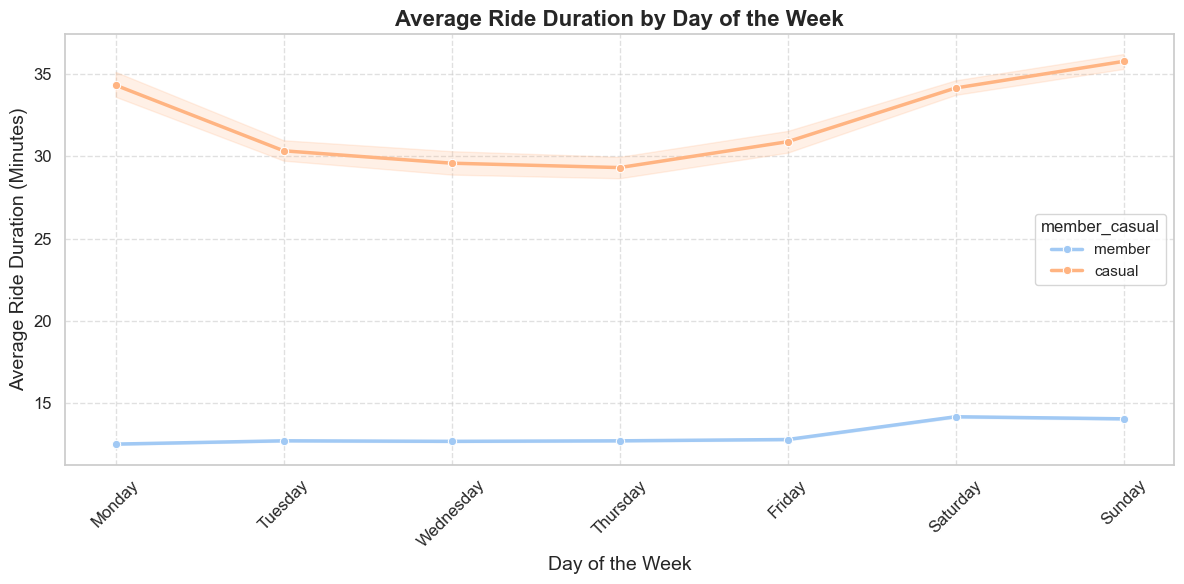

In [100]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
full_data['day_of_week'] = pd.Categorical(full_data['day_of_week'], categories=day_order, ordered=True)
sns.set(style="whitegrid", palette="pastel")

# Create a figure with a defined size
plt.figure(figsize=(12, 6))


sns.lineplot(
    data=full_data,
    x='day_of_week',
    y='ride_duration_minutes',
    hue='member_casual',
    marker='o',  # Add markers for each point
    color='#007acc',  # Custom color for the line
    linewidth=2.5
)

# Add labels and title
plt.title("Average Ride Duration by Day of the Week", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Ride Duration (Minutes)", fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

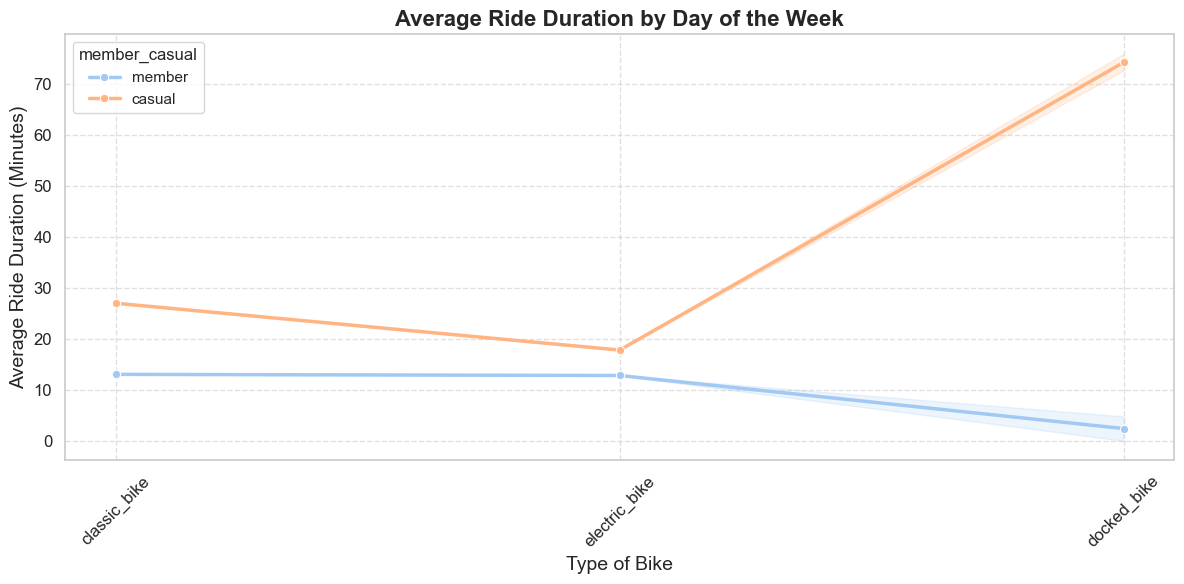

In [101]:
sns.set(style="whitegrid", palette="pastel")

# Create a figure with a defined size
plt.figure(figsize=(12, 6))


sns.lineplot(
    data=full_data,
    x='rideable_type',
    y='ride_duration_minutes',
    hue='member_casual',
    marker='o',  # Add markers for each point
    color='#007acc',  # Custom color for the line
    linewidth=2.5
)

# Add labels and title
plt.title("Average Ride Duration by Day of the Week", fontsize=16, fontweight='bold')
plt.xlabel("Type of Bike", fontsize=14)
plt.ylabel("Average Ride Duration (Minutes)", fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_3386/485933284.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#007acc'` for the same effect.

  sns.barplot(


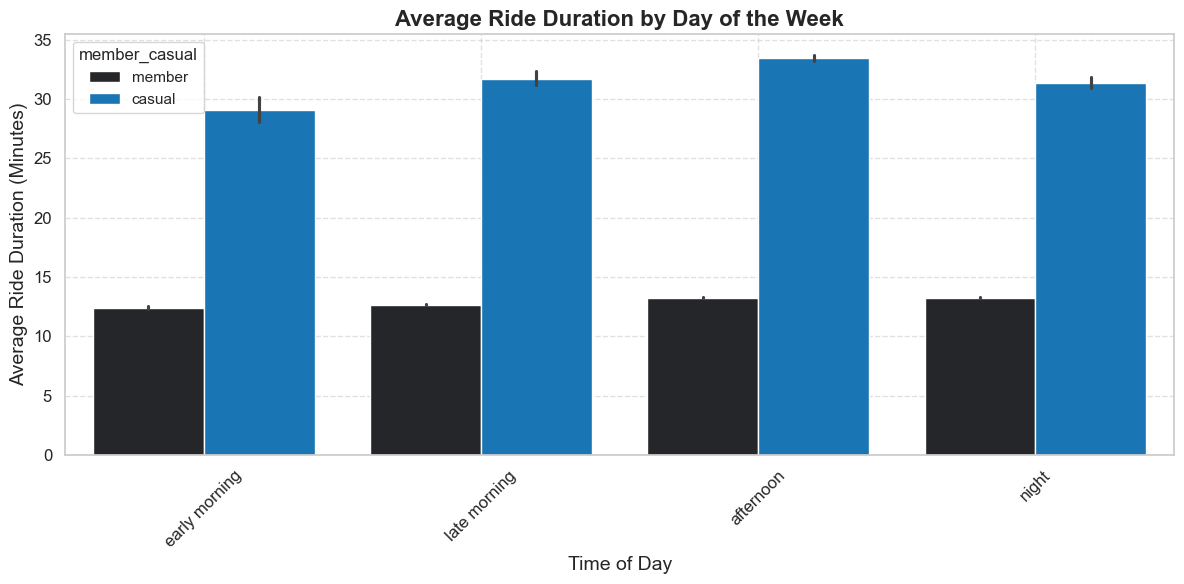

In [102]:
sns.set(style="whitegrid", palette="pastel")

# Create a figure with a defined size
plt.figure(figsize=(12, 6))


sns.barplot(
    data=full_data,
    x='time_of_day',
    y='ride_duration_minutes',
    hue='member_casual',
    color='#007acc',  # Custom color for the line
)

# Add labels and title
plt.title("Average Ride Duration by Day of the Week", fontsize=16, fontweight='bold')
plt.xlabel("Time of Day", fontsize=14)
plt.ylabel("Average Ride Duration (Minutes)", fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [103]:
full_data = full_data.dropna()

In [127]:
del m

In [134]:
import folium
from branca.colormap import linear

density = folium.Map(location=[full_data['start_lat'].mean(), full_data['start_lng'].mean()], zoom_start=12)

# Create a color scale for ride duration
colormap = linear.RdYlBu_09.scale(full_data["ride_duration_minutes"].min(), full_data["ride_duration_minutes"].max())

# Iterating over the DataFrame rows
for index, row in full_data.head(1000).iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=8,
        color=colormap(row['ride_duration_minutes']),
        fill=True,
        fill_color=colormap(row['ride_duration_minutes']),
        fill_opacity=0.7,
        popup=f"Start: {row['start_station_name']}<br>Duration: {row['ride_duration_minutes']} mins",
    ).add_to(density)

# Add the color scale to the map
colormap.add_to(density)

# Display the map
density